The data

We will be using the well explored Wine Data from SciKit-Learn. There are 13 features and a ‘real_class’ column.

Please remember that in the real world you will not have a real class column, as the goal of clustering is to find out how many distinct classes there are and then analyse the properties of each, in order to derive some value.

In [4]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine 

## Import the Wine dataset from SciKit-Learn 
wine_bunch = load_wine() 
# Allocating this data to a Data Frame 
wine = pd.DataFrame(wine_bunch.data) 
# Use the feature_names attribute to give sensible column headings 
# Assigning wine.columns to col names for use later 
col_names = list(wine_bunch.feature_names) 
# Once colum has a lenghty name, we rename this for ease of display 
# od280/od315_of_diluted_wines -> od280_od315 
col_names[11] = 'od280_od315' 
wine.columns = col_names 
# I am adding a 1 to the 'real classes' columns to avoid having to talk about 'cluster 0' 
# We will start the count from 1 
wine['real_classes'] = wine_bunch.target + 1
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280_od315  proline  real_classes  
0         3.92   1065.0             1  
1         3.40   1050.0             1  
2         3.17   1185.0             1  
3         3.45   1480.0             1  
4         2.93    735.0             1

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   alcalinity_of_ash     178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280_od315           178 non-null    float64
 12  proline               178 non-null    float64
 13  real_classes          178 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


In [6]:
wine.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280_od315      proline  real_classes  
count       178.000000  178.000000   178.000000   178.000000    178.000000  
mean          5.058090    0.957449     2.611685   746.893258      1.938202  
std           2.318286    0.228572     0.709990   314.907474      0.775035  
min           1.280000    0.480000     1.270000   278.000000      1.000000  
25%           3.220000    0.782500     1.937500   500.500000      1.000000  
50%           4.690000    0.965000     2.780000   673.500000      2.000000  
75%           6.200000    1.120000     3.170000   985.000000      3.000000  
max          13.000000    1.710000     4.000000  1680.000000      3.000000

In [7]:
wine["real_classes"].unique()

array([1, 2, 3])

In [9]:
wine["real_classes"].value_counts()

real_classes
2    71
1    59
3    48
Name: count, dtype: int64

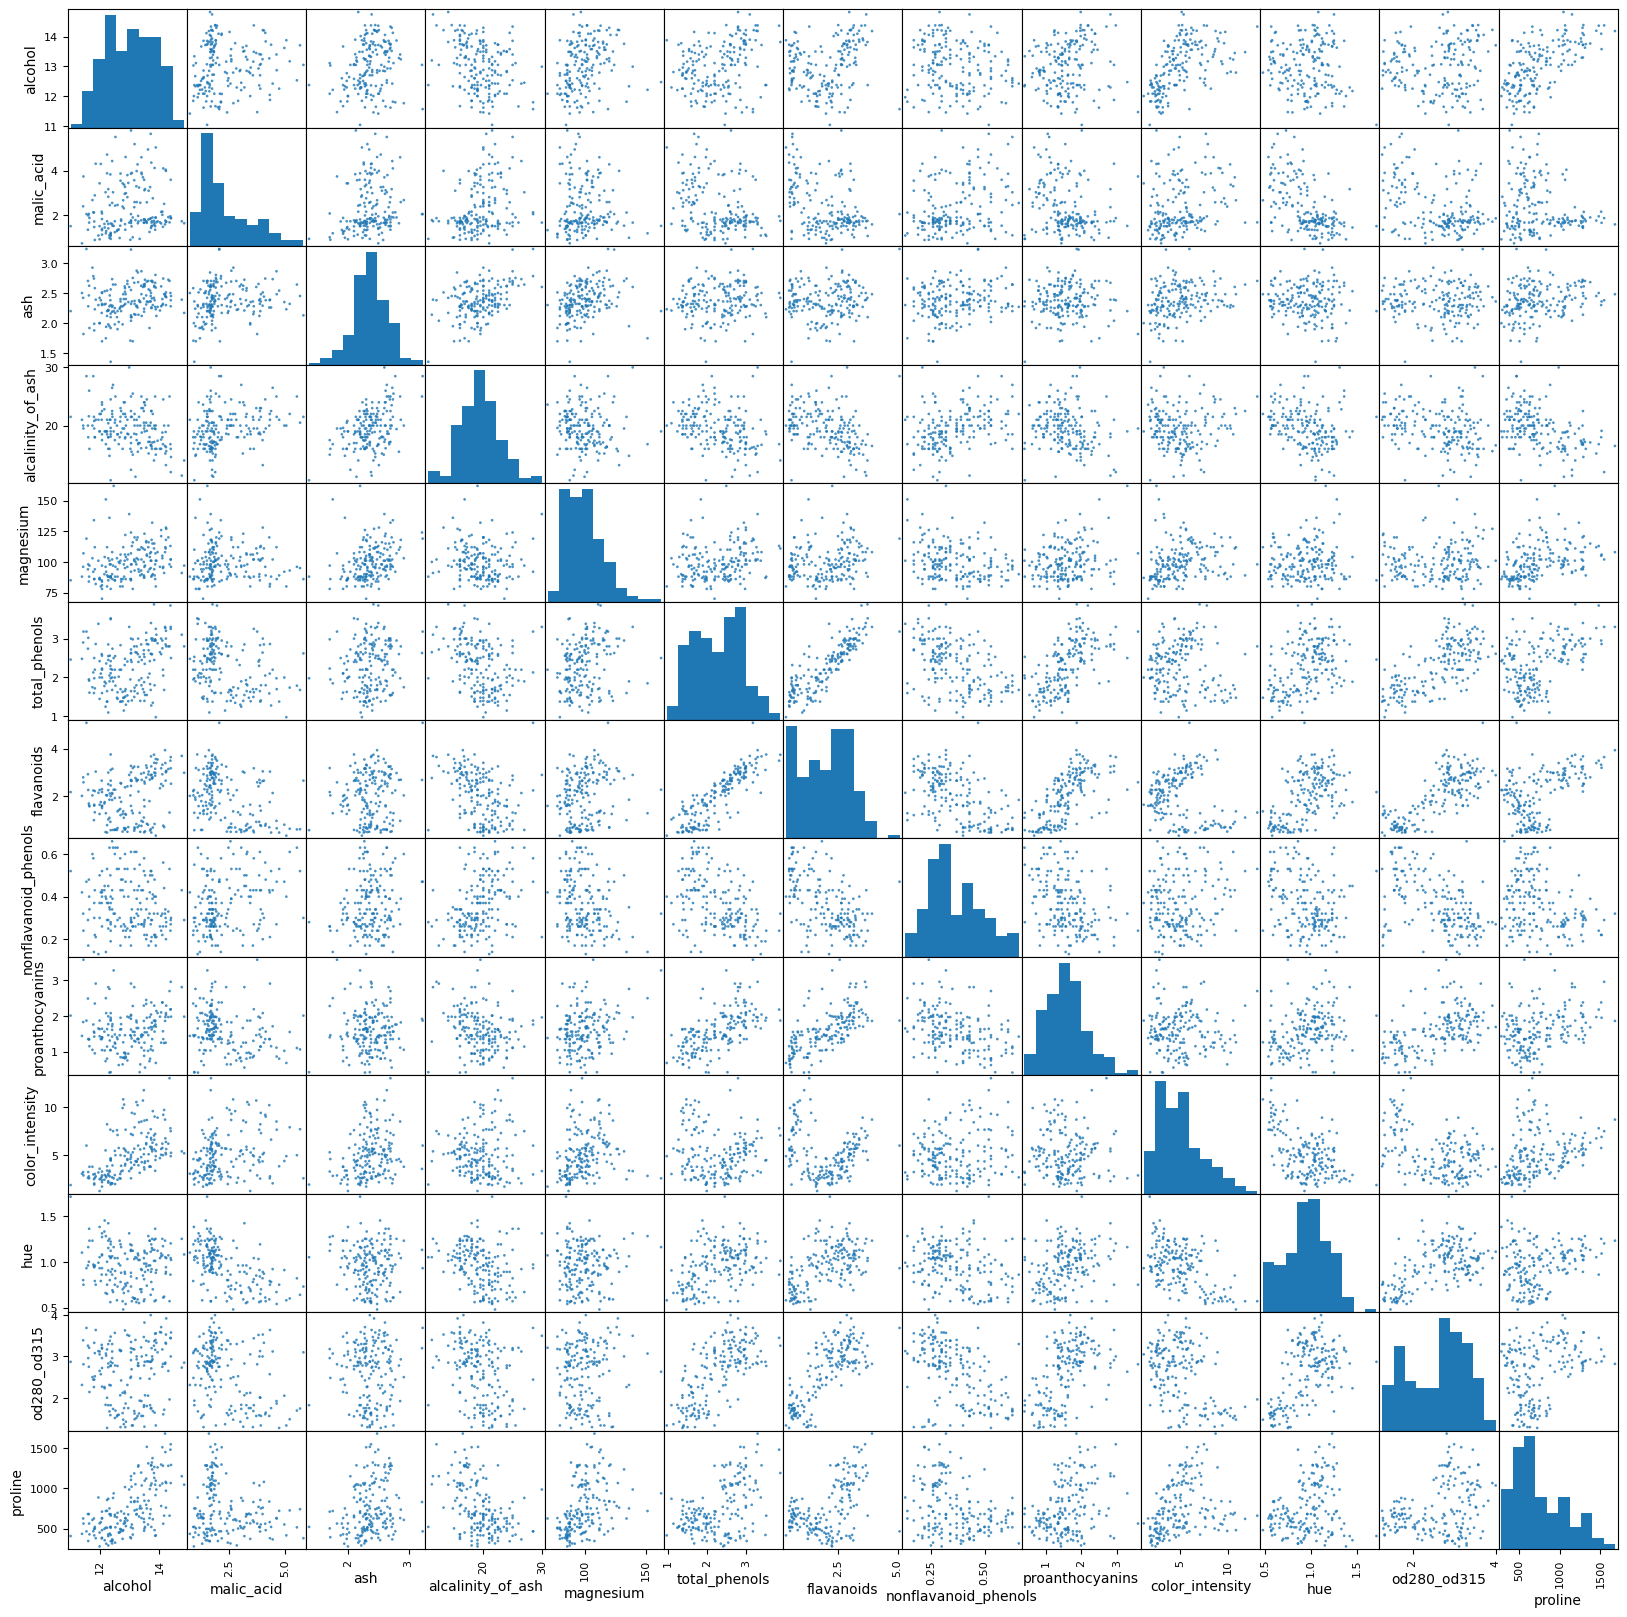

In [15]:
# Plotting all features against each other on scatter plots and
# visualising their distribution
c = pd.plotting.scatter_matrix(wine[col_names],
                                     figsize=(20, 20),
                                     marker = ".",
                                     s = 15,
                                     alpha = 0.8)

## Exercise 3 – Building your first model


In [17]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=2,
                n_init = 10,
                max_iter = 300,
                random_state = 42).fit(wine[col_names])

## The centroids can be extracted
centroids1 = kmeans1.cluster_centers_

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

In [18]:
## The centroids can be extracted 
centroids1 = kmeans1.cluster_centers_ 
## This is the list of allocated classes 
labels1 = kmeans1.labels_ 
## Appending these labels to our original dataframe 
# I added 1 again to avoid talking about class 0 
wine['kmeans1'] = labels1 + 1

In [21]:
wine.groupby("kmeans1").mean()

alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
kmeans1                                                                   
1        12.702846    2.544553  2.339106          20.408130   96.813008   
2        13.666545    1.870727  2.427818          17.452727  106.290909   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
kmeans1                                                                     
1             2.062114    1.641463              0.392683         1.454065   
2             2.816182    2.896545              0.292909         1.896909   

         color_intensity       hue  od280_od315      proline  real_classes  
kmeans1                                                                     
1               4.851382  0.908618     2.408211   565.869919      2.308943  
2               5.520364  1.066655     3.066727  1151.727273      1.109091

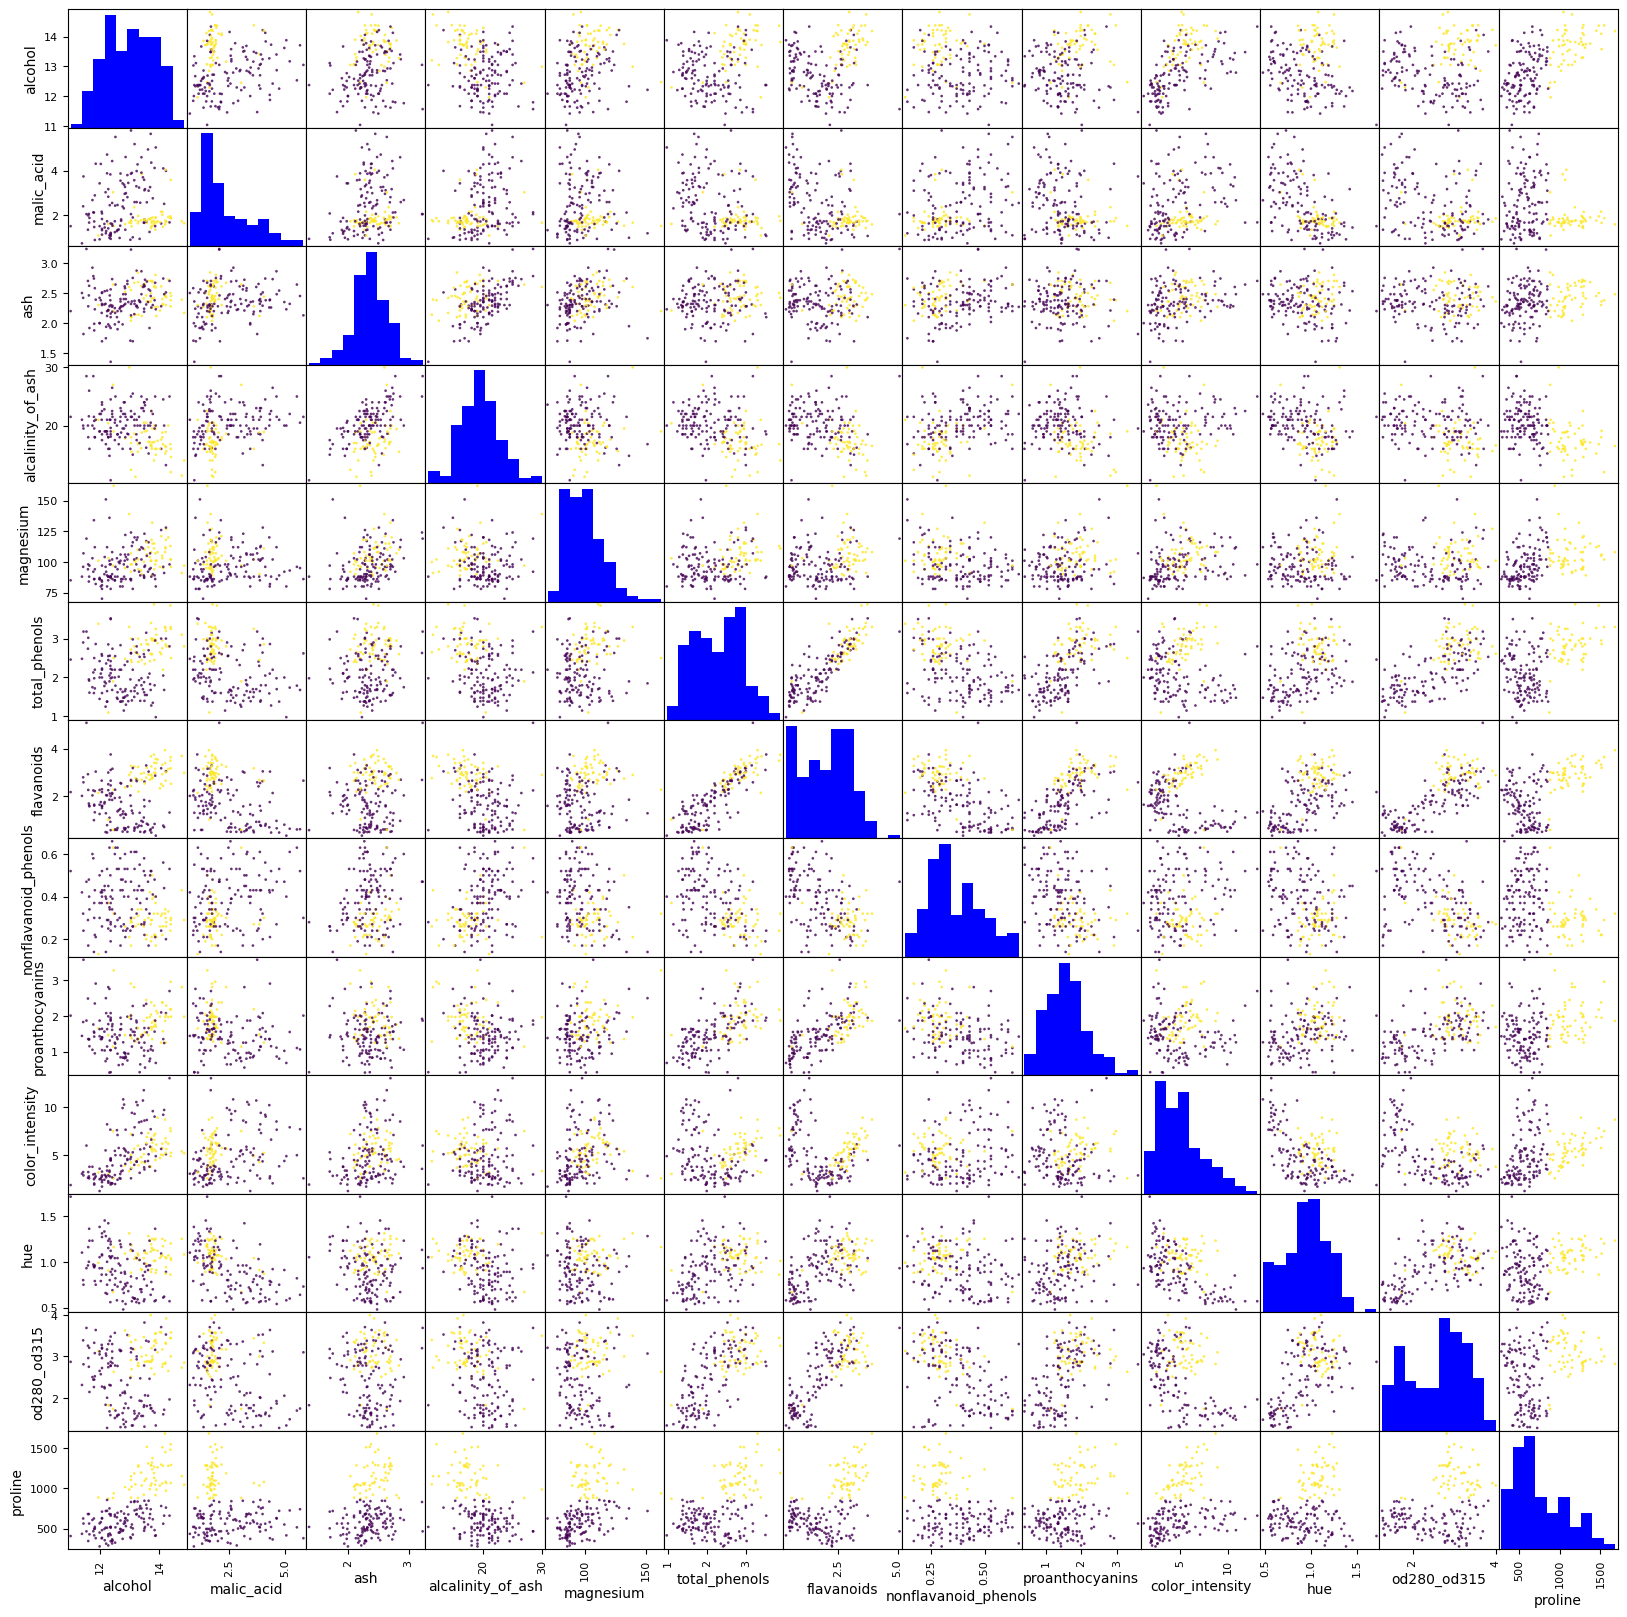

In [22]:
import matplotlib as mpl 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "r", "g"]) 
plot = pd.plotting.scatter_matrix(wine[col_names], 
                                  figsize=(20,20), 
                                  marker = '.', s = 15, 
                                  alpha = 0.8, c = wine['kmeans1'])

In [24]:
wine.groupby(["real_classes", "kmeans1"])["real_classes"].count().unstack("kmeans1")

kmeans1        1   2
real_classes        
1              9  50
2             67   4
3             47   1

## Exercise 4 – Changing clusters and features:

In [26]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=3,
                n_init = 10,
                max_iter = 300,
                random_state = 42).fit(wine[col_names])

## The centroids can be extracted
centroids2 = kmeans2.cluster_centers_
 
## This is the list of allocated classes 
labels2 = kmeans2.labels_ 
## Appending these labels to our original dataframe 
# I added 1 again to avoid talking about class 0 
wine['kmeans2'] = labels2 + 1

wine.groupby("kmeans2").mean()

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
kmeans2                                                                   
1        12.516667    2.494203  2.288551          20.823188   92.347826   
2        13.804468    1.883404  2.426170          17.023404  105.510638   
3        12.929839    2.504032  2.408065          19.890323  103.596774   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
kmeans2                                                                     
1             2.070725    1.758406              0.390145         1.451884   
2             2.867234    3.014255              0.285319         1.910426   
3             2.111129    1.584032              0.388387         1.503387   

         color_intensity       hue  od280_od315      proline  real_classes  \
kmeans2                                                                      
1               4.086957  0.941159     2.490725   458.231884      2.275362   
2               5.702553  1.078298     3.114043  1195.148936      1.021277   
3               5.650323  0.883968     2.365484   728.338710      2.258065   

          kmeans1  
kmeans2            
1        1.000000  
2        2.000000  
3        1.129032

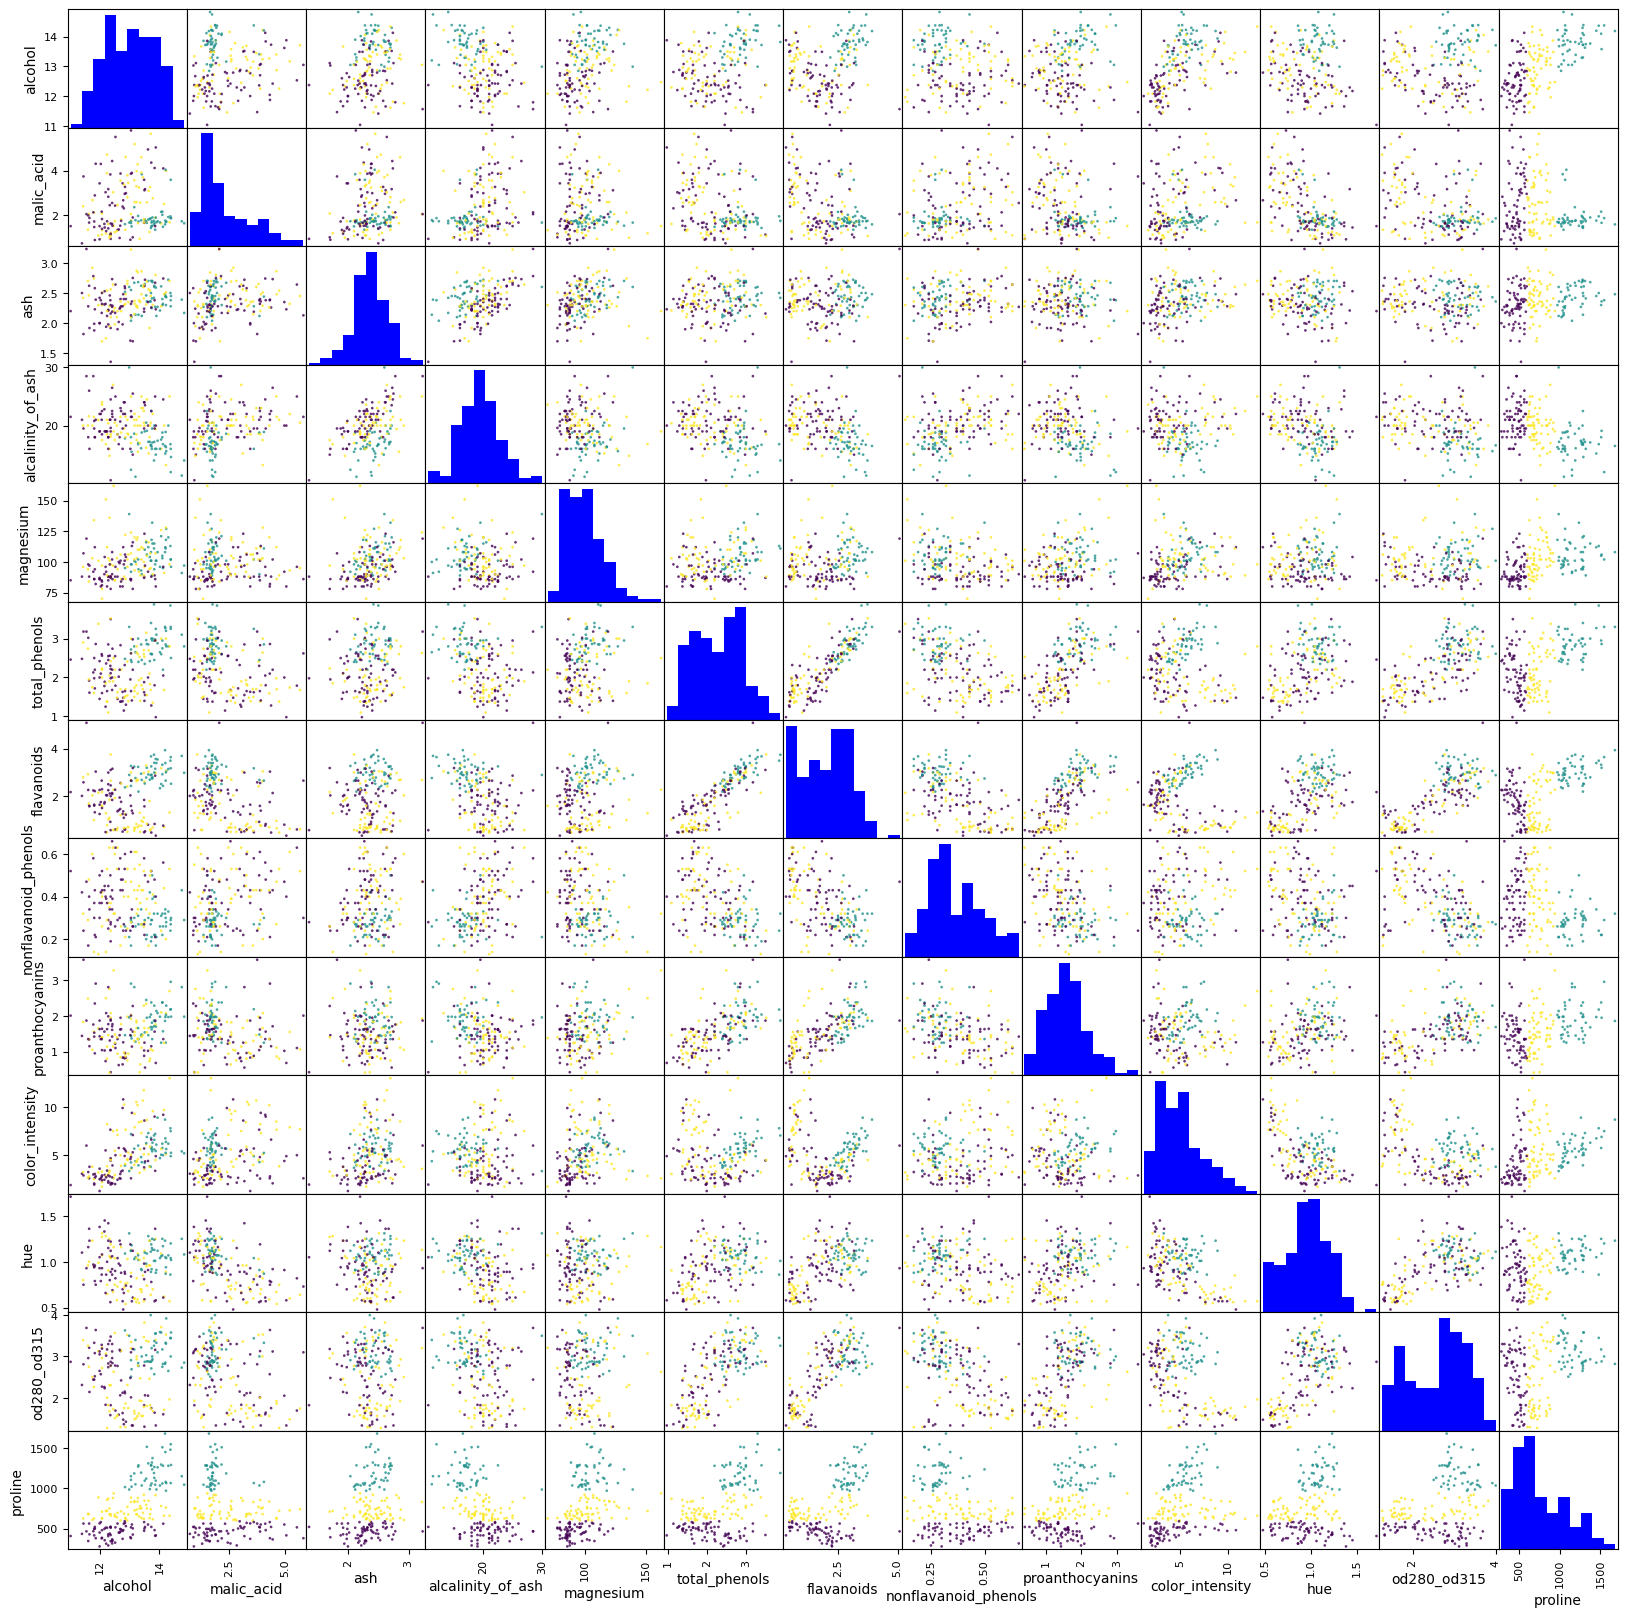

In [27]:
import matplotlib as mpl 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "r", "g"]) 
plot = pd.plotting.scatter_matrix(wine[col_names], 
                                  figsize=(20,20), 
                                  marker = '.', s = 15, 
                                  alpha = 0.8, c = wine['kmeans2'])

In [28]:
wine.groupby(["real_classes", "kmeans2"])["real_classes"].count().unstack("real_classes")

real_classes     1     2     3
kmeans2                       
1              NaN  50.0  19.0
2             46.0   1.0   NaN
3             13.0  20.0  29.0

In [29]:
# Create a list of reduced columns
reduced_cols = ["alcohol", "alcalinity_of_ash", "magnesium", "color_intensity", "proline" ]
reduced_cols

['alcohol', 'alcalinity_of_ash', 'magnesium', 'color_intensity', 'proline']

In [32]:
# fit the model, 3 clusters, reduced features

### REMEBER TO RENAME EVERYTHING SO AS NOT TO OVERWRITE ###
kmeans3 = KMeans(n_clusters=3,
                n_init = 10,
                max_iter = 300,
                random_state = 3).fit(wine[col_names])

## The centroids can be extracted
centroids3 = kmeans3.cluster_centers_
 
## This is the list of allocated classes 
labels3 = kmeans3.labels_ 
## Appending these labels to our original dataframe 
# I added 1 again to avoid talking about class 0 
wine['kmeans3'] = labels3 + 1

wine.groupby("kmeans3").mean()



C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
kmeans3                                                                   
1        12.929839    2.504032  2.408065          19.890323  103.596774   
2        13.804468    1.883404  2.426170          17.023404  105.510638   
3        12.516667    2.494203  2.288551          20.823188   92.347826   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
kmeans3                                                                     
1             2.111129    1.584032              0.388387         1.503387   
2             2.867234    3.014255              0.285319         1.910426   
3             2.070725    1.758406              0.390145         1.451884   

         color_intensity       hue  od280_od315      proline  real_classes  \
kmeans3                                                                      
1               5.650323  0.883968     2.365484   728.338710      2.258065   
2               5.702553  1.078298     3.114043  1195.148936      1.021277   
3               4.086957  0.941159     2.490725   458.231884      2.275362   

          kmeans1  kmeans2  
kmeans3                     
1        1.129032      3.0  
2        2.000000      2.0  
3        1.000000      1.0

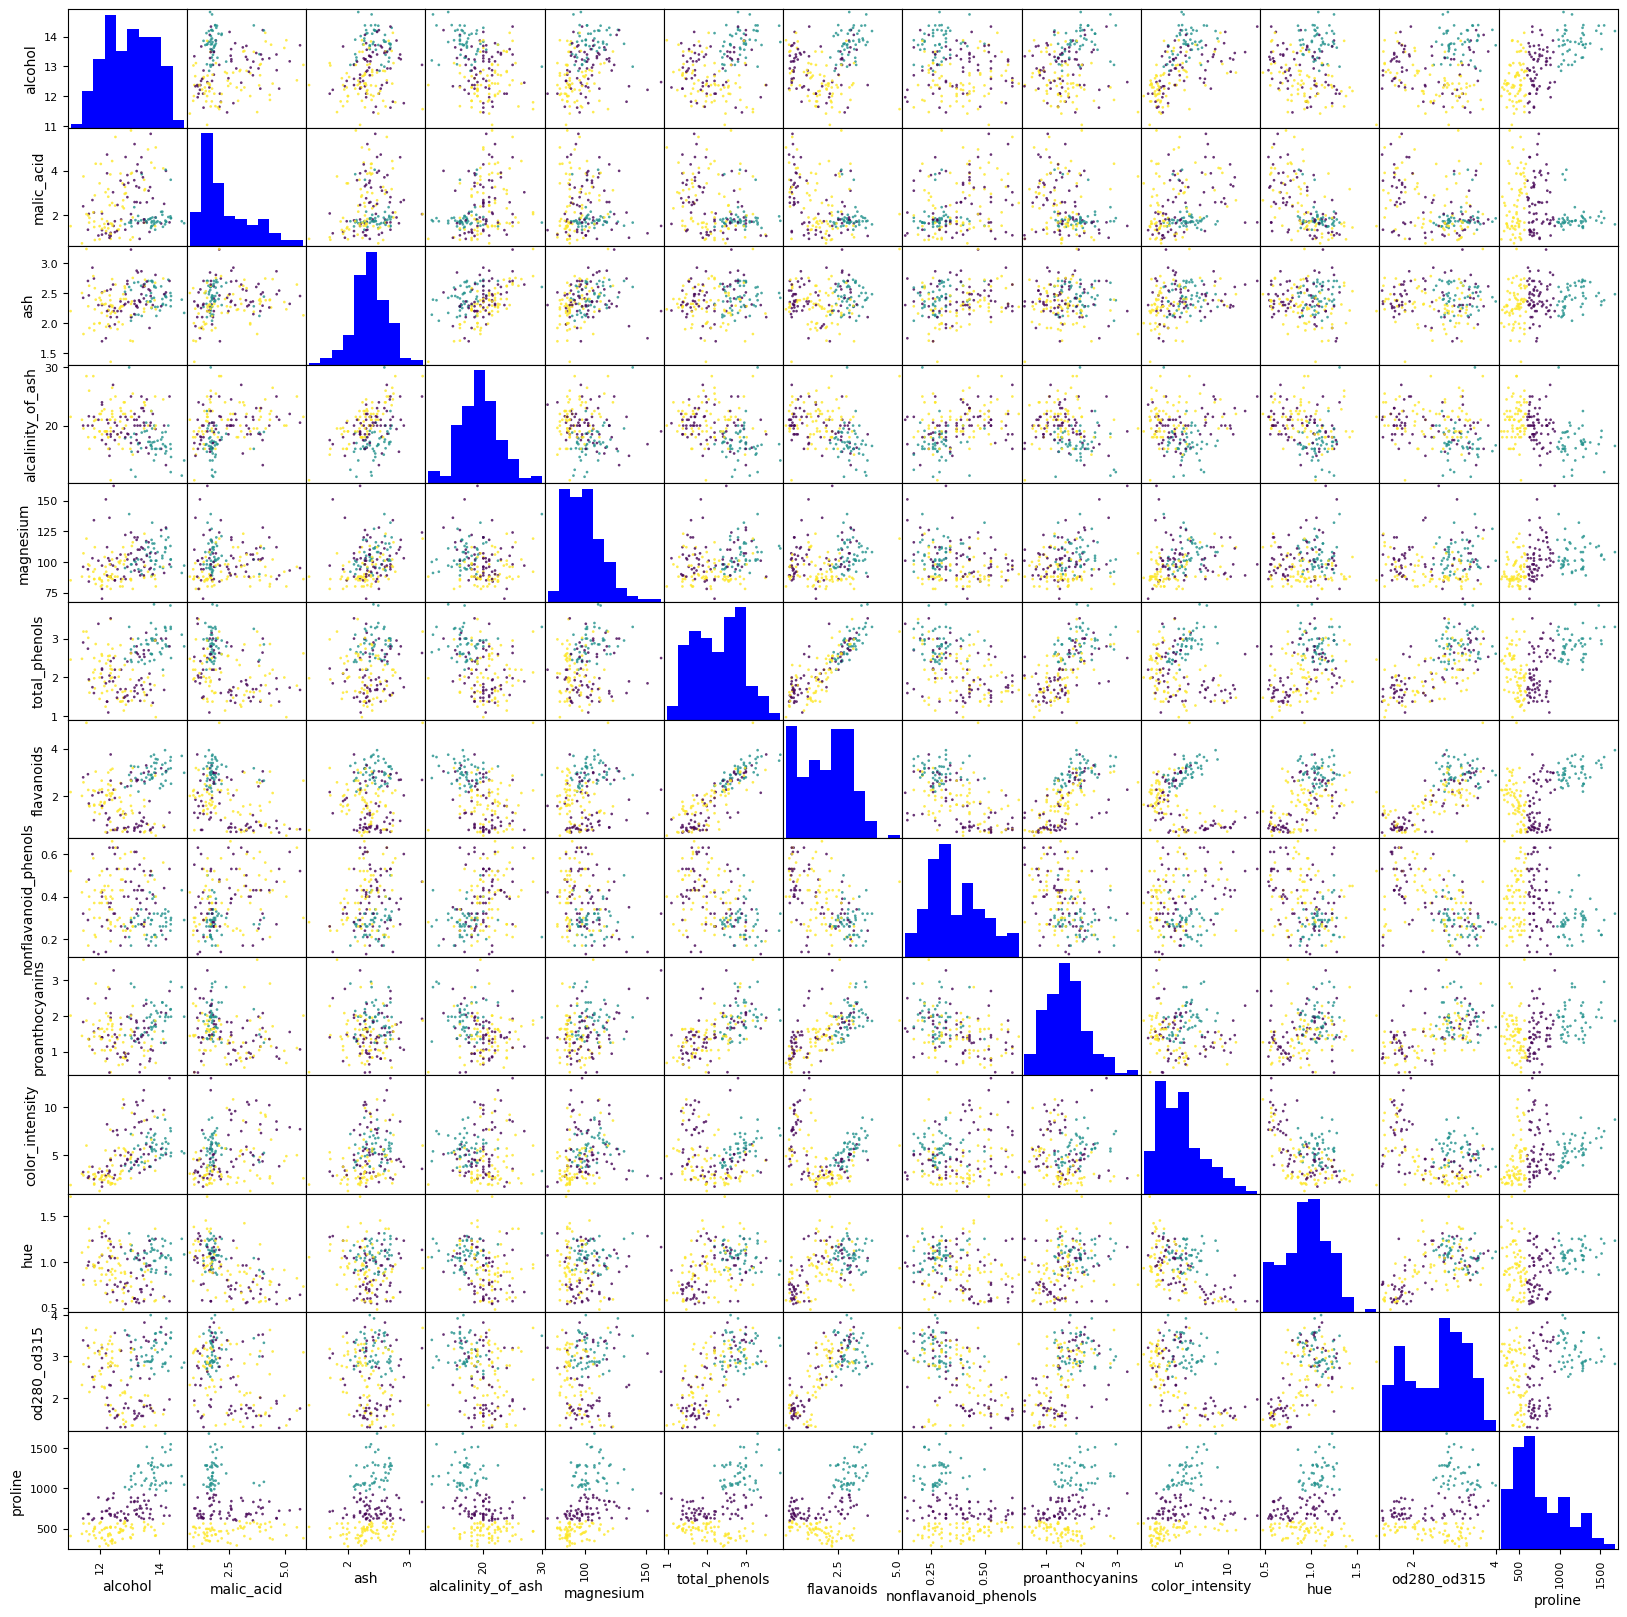

In [33]:
import matplotlib as mpl 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "r", "g"]) 
plot = pd.plotting.scatter_matrix(wine[col_names], 
                                  figsize=(20,20), 
                                  marker = '.', s = 15, 
                                  alpha = 0.8, c = wine['kmeans3'])

In [34]:
wine.groupby(["real_classes", "kmeans3"])["real_classes"].count().unstack("real_classes")

real_classes     1     2     3
kmeans3                       
1             13.0  20.0  29.0
2             46.0   1.0   NaN
3              NaN  50.0  19.0

In [35]:
# fit the model, 3 clusters, reduced features

### REMEBER TO RENAME EVERYTHING SO AS NOT TO OVERWRITE ###
kmeans4 = KMeans(n_clusters=3,
                n_init = 10,
                max_iter = 300,
                random_state = 3).fit(wine["proline"].values.reshape(-1,1))

## The centroids can be extracted
centroids4 = kmeans4.cluster_centers_
 
## This is the list of allocated classes 
labels4 = kmeans4.labels_ 
## Appending these labels to our original dataframe 
# I added 1 again to avoid talking about class 0 
wine['kmeans4'] = labels4 + 1

wine.groupby("kmeans4").mean()


C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
kmeans4                                                                   
1        12.929839    2.504032  2.408065          19.890323  103.596774   
2        13.804468    1.883404  2.426170          17.023404  105.510638   
3        12.516667    2.494203  2.288551          20.823188   92.347826   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
kmeans4                                                                     
1             2.111129    1.584032              0.388387         1.503387   
2             2.867234    3.014255              0.285319         1.910426   
3             2.070725    1.758406              0.390145         1.451884   

         color_intensity       hue  od280_od315      proline  real_classes  \
kmeans4                                                                      
1               5.650323  0.883968     2.365484   728.338710      2.258065   
2               5.702553  1.078298     3.114043  1195.148936      1.021277   
3               4.086957  0.941159     2.490725   458.231884      2.275362   

          kmeans1  kmeans2  kmeans3  
kmeans4                              
1        1.129032      3.0      1.0  
2        2.000000      2.0      2.0  
3        1.000000      1.0      3.0

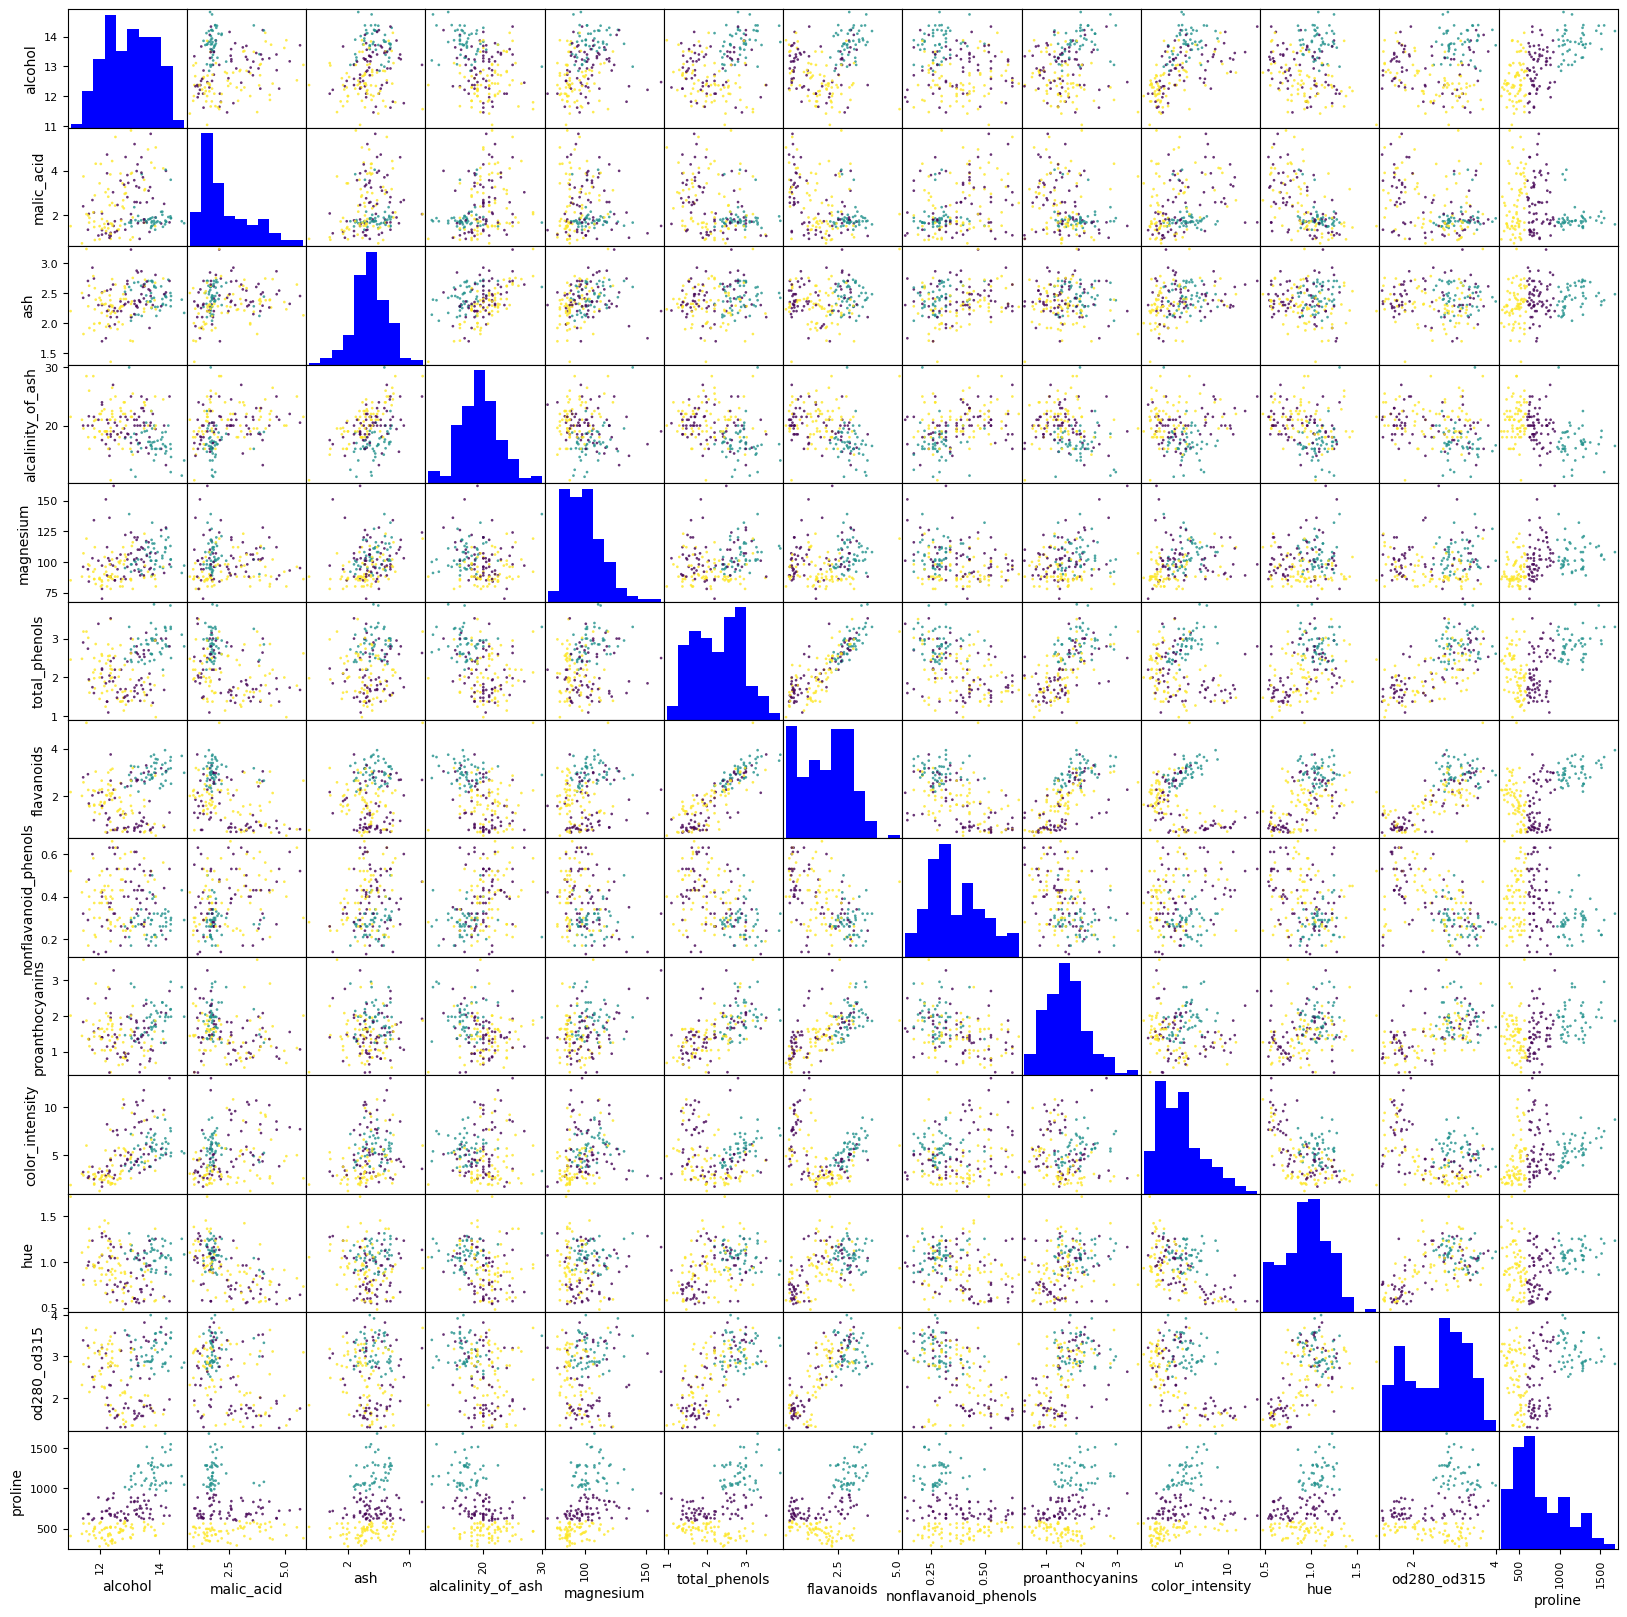

In [36]:
import matplotlib as mpl 
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "r", "g"]) 
plot = pd.plotting.scatter_matrix(wine[col_names], 
                                  figsize=(20,20), 
                                  marker = '.', s = 15, 
                                  alpha = 0.8, c = wine['kmeans4'])

In [37]:
wine.groupby(["real_classes", "kmeans4"])["real_classes"].count().unstack("real_classes")

real_classes     1     2     3
kmeans4                       
1             13.0  20.0  29.0
2             46.0   1.0   NaN
3              NaN  50.0  19.0

## Exercise 5 – Scaling

In [39]:
from sklearn import preprocessing
# defining the column to scale
columns_to_scale = col_names

# calling the MinMaxScaler with default settings
min_max_scaler = preprocessing.MinMaxScaler()

# Fitting the scaler to the two named columns, creating a new DataFrame from this array
# Assigning the column names to the new dataframe
wine_std = pd.DataFrame(min_max_scaler.fit_transform(wine[columns_to_scale]),
                       columns = min_max_scaler.get_feature_names_out())

# Viewing the new DataFrame
wine_std

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.627586    0.573840              0.283019         0.593060   
1         0.575862    0.510549              0.245283         0.274448   
2         0.627586    0.611814              0.320755         0.757098   
3         0.989655    0.664557              0.207547         0.558360   
4         0.627586    0.495781              0.490566         0.444795   
..             ...         ...                   ...              ...   
173       0.241379    0.056962              0.735849         0.205047   
174       0.282759    0.086498              0.566038         0.315457   
175       0.210345    0.073840              0.566038         0.296530   
176       0.231034    0.071730              0.754717         0.331230   
177       0.368966    0.088608              0.811321         0.296530   

     color_intensity       hue  od280_od315   proline  
0           0.372014  0.455285     0.970696  0.561341  
1           0.264505  0.463415     0.780220  0.550642  
2           0.375427  0.447154     0.695971  0.646933  
3           0.556314  0.308943     0.798535  0.857347  
4           0.259386  0.455285     0.608059  0.325963  
..               ...       ...          ...       ...  
173         0.547782  0.130081     0.172161  0.329529  
174         0.513652  0.178862     0.106227  0.336662  
175         0.761092  0.089431     0.106227  0.397290  
176         0.684300  0.097561     0.128205  0.400856  
177         0.675768  0.105691     0.120879  0.201141  

[178 rows x 13 columns]

In [40]:
# fit the model, 3 clusters, reduced features

### REMEBER TO RENAME EVERYTHING SO AS NOT TO OVERWRITE ###
kmeans5 = KMeans(n_clusters=3,
                n_init = 10,
                max_iter = 300,
                random_state = 3).fit(wine_std)

## The centroids can be extracted
centroids5 = kmeans5.cluster_centers_
 
## This is the list of allocated classes 
labels5 = kmeans5.labels_ 
## Appending these labels to our original dataframe 
# I added 1 again to avoid talking about class 0 
wine['kmeans5'] = labels5 + 1

wine.groupby("kmeans5").mean()

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
kmeans5                                                                   
1        13.711475    1.997049  2.453770          17.281967  107.786885   
2        12.220794    1.932222  2.244603          20.304762   92.587302   
3        13.107407    3.191111  2.410185          21.050000   99.000000   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
kmeans5                                                                     
1             2.842131    2.969180              0.289180         1.922951   
2             2.279365    2.141587              0.351905         1.669048   
3             1.695556    0.836481              0.455556         1.124630   

         color_intensity       hue  od280_od315      proline  real_classes  \
kmeans5                                                                      
1               5.444590  1.067705     3.154754  1110.639344      1.032787   
2               3.012063  1.060794     2.864921   497.238095      2.000000   
3               7.008519  0.712333     1.702778   627.259259      2.888889   

          kmeans1   kmeans2   kmeans3   kmeans4  
kmeans5                                          
1        1.852459  2.229508  1.770492  1.770492  
2        1.015873  1.507937  2.492063  2.492063  
3        1.037037  2.185185  1.814815  1.814815

In [41]:
wine.groupby(["real_classes", "kmeans5"])["real_classes"].count().unstack("real_classes")

real_classes     1     2     3
kmeans5                       
1             59.0   2.0   NaN
2              NaN  63.0   NaN
3              NaN   6.0  48.0